In [1]:
%pip install -r ~/code/GitHub/UPennContrast/devops/girder/annotation_client/requirements.txt
%pip install -e ~/code/GitHub/UPennContrast/devops/girder/annotation_client/
%pip install pandas
%pip install imageio
%pip install rtree
%pip install scikit-image
%pip install shapely
%pip install nd2reader

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///Users/arjunraj/code/GitHub/UPennContrast/devops/girder/annotation_client
  Attempting uninstall: annotation-client
    Found existing installation: annotation-client 0.1
    Uninstalling annotation-client-0.1:
      Successfully uninstalled annotation-client-0.1
  Running setup.py develop for annotation-client
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading 

In [15]:
import girder_client
import annotation_client.annotations as annotations
import annotation_client.tiles as tiles
import pandas as pd
#import imageio
from shapely.geometry import Point, Polygon, LineString
#pd.set_option('display.max_colwidth', None)
import numpy as np

In [16]:
apiUrl = 'http://localhost:8080/api/v1'
username = 'admin'
password = 'password'

In [3]:
client = girder_client.GirderClient(apiUrl=apiUrl)
user_id = client.authenticate(username=username, password=password)['_id']
annotationClient = annotations.UPennContrastAnnotationClient(apiUrl=apiUrl, token=client.token)

In [75]:
datasets = dict()
for folder in annotationClient.client.listFolder(user_id,'user'):
    for dataset in annotationClient.client.listFolder(folder['_id']):
        datasets[dataset['name']] = dataset['_id']

pd.DataFrame(datasets.keys(),columns=['Dataset Name'])

,Dataset Name
0,Connection_testing_normmedia_8well_col2_livece...
1,DDX58_AXL_EGFR_well2
2,i
3,img000_000_000000_0000000000.ome
4,myfile
5,NEW_GOLNAZ
6,NEWTEST
7,output.ome
8,output_file
9,output_file2


In [18]:
dataset_name = 'DDX58_AXL_EGFR_well2'

In [76]:
datasetId = datasets[dataset_name]
datasetClient = tiles.UPennContrastDataset(apiUrl=apiUrl, token=client.token, datasetId=datasetId)
print(datasetClient.tiles)
tile_width = datasetClient.tiles['tileWidth']
tile_height = datasetClient.tiles['tileHeight']
print(datasetId)
print(tile_width)
print(tile_height)

{'IndexRange': {'IndexC': 5, 'IndexXY': 10, 'IndexZ': 29}, 'IndexStride': {'IndexC': 1, 'IndexXY': 145, 'IndexZ': 5}, 'bandCount': 1, 'channelmap': {'A594': 2, 'Brightfield': 0, 'CY3': 1, 'CY5': 3, 'DAPI': 4}, 'channels': ['Brightfield', 'CY3', 'A594', 'CY5', 'DAPI'], 'dtype': 'uint16', 'frames': [{'Channel': 'Brightfield', 'Frame': 0, 'Index': 0, 'IndexC': 0, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'CY3', 'Frame': 1, 'Index': 0, 'IndexC': 1, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'A594', 'Frame': 2, 'Index': 0, 'IndexC': 2, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'CY5', 'Frame': 3, 'Index': 0, 'IndexC': 3, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'DAPI', 'Frame': 4, 'Index': 0, 'IndexC': 4, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'Brightfield', 'Frame': 5, 'Index': 1, 'IndexC': 0, 'IndexXY': 0, 'IndexZ': 1}, {'Channel': 'CY3', 'Frame': 6, 'Index': 1, 'IndexC': 1, 'IndexXY': 0, 'IndexZ': 1}, {'Channel': 'A594', 'Frame': 7, 'Index': 1, 'IndexC': 2, 'IndexXY': 0, 'IndexZ': 1}, {'Channel'

In [77]:
pointAnnotationList = annotationClient.getAnnotationsByDatasetId(datasetId, shape='point')
blobAnnotationList = annotationClient.getAnnotationsByDatasetId(datasetId, shape='polygon')
lineAnnotationList = annotationClient.getAnnotationsByDatasetId(datasetId, shape='line')

In [78]:
print(len(blobAnnotationList))
print(len(pointAnnotationList))
print(len(lineAnnotationList))
print(blobAnnotationList[0])
print(pointAnnotationList[0])
#print(lineAnnotationList[0])

11
8
0
{'_id': '6568e6bfb98181709b140ff5', 'access': {'groups': [], 'users': [{'flags': [], 'id': '65689787d45237881913b68f', 'level': 2}]}, 'channel': 4, 'coordinates': [{'x': 335.5, 'y': 475.5}, {'x': 329.5, 'y': 472.5}, {'x': 317.5, 'y': 472.5}, {'x': 313.5, 'y': 475.5}, {'x': 306.5, 'y': 475.5}, {'x': 300.5, 'y': 478.5}, {'x': 295.5, 'y': 486.5}, {'x': 292.5, 'y': 494.5}, {'x': 292.5, 'y': 509.5}, {'x': 297.5, 'y': 516.5}, {'x': 301.5, 'y': 520.5}, {'x': 306.5, 'y': 522.5}, {'x': 311.5, 'y': 523.5}, {'x': 320.5, 'y': 523.5}, {'x': 328.5, 'y': 520.5}, {'x': 336.5, 'y': 516.5}, {'x': 343.5, 'y': 513.5}, {'x': 348.5, 'y': 507.5}, {'x': 350.5, 'y': 498.5}, {'x': 350.5, 'y': 488.5}], 'datasetId': '6568d33bb98181709b13fd75', 'location': {'Time': 0, 'XY': 0, 'Z': 11}, 'shape': 'polygon', 'tags': ['nucleus']}
{'_id': '65c63416e62fc888551f171e', 'access': {'groups': [], 'users': [{'flags': [], 'id': '65689787d45237881913b68f', 'level': 2}]}, 'channel': 1, 'coordinates': [{'x': 338.571388164

In [80]:
print(pointAnnotationList[0]['coordinates'])
print(pointAnnotationList[0]['coordinates'][0]['x'])
print(pointAnnotationList[0]['coordinates'][0]['y'])

[{'x': 338.5713881648452, 'y': 427.3475029678598, 'z': 0}]
338.5713881648452
427.3475029678598


In [81]:
import annotation_client.workers as workers

params = {'id': '6568d33bb98181709b13fd75', 'name': 'metrics2', 'image': 'properties/blob_metrics:latest', 'tags': {'exclusive': False, 'tags': ['nucleus']}, 'shape': 'polygon', 'workerInterface': {}, 'scales': {'pixelSize': {'unit': 'mm', 'value': 0.000219080212825376}, 'tStep': {'unit': 's', 'value': 1}, 'zStep': {'unit': 'm', 'value': 1}}}

workerClient = workers.UPennContrastWorkerClient(datasetId, apiUrl, client.token, params)


In [89]:
annotation = pointAnnotationList[1]
image = workerClient.get_image_for_annotation(annotation)
print(image.shape)

x = annotation['coordinates'][0]['x']
y = annotation['coordinates'][0]['y']
print(annotation['location']['Z'])
print(x,y)


(1022, 1024)
11
338.5713881648452 427.3475029678598


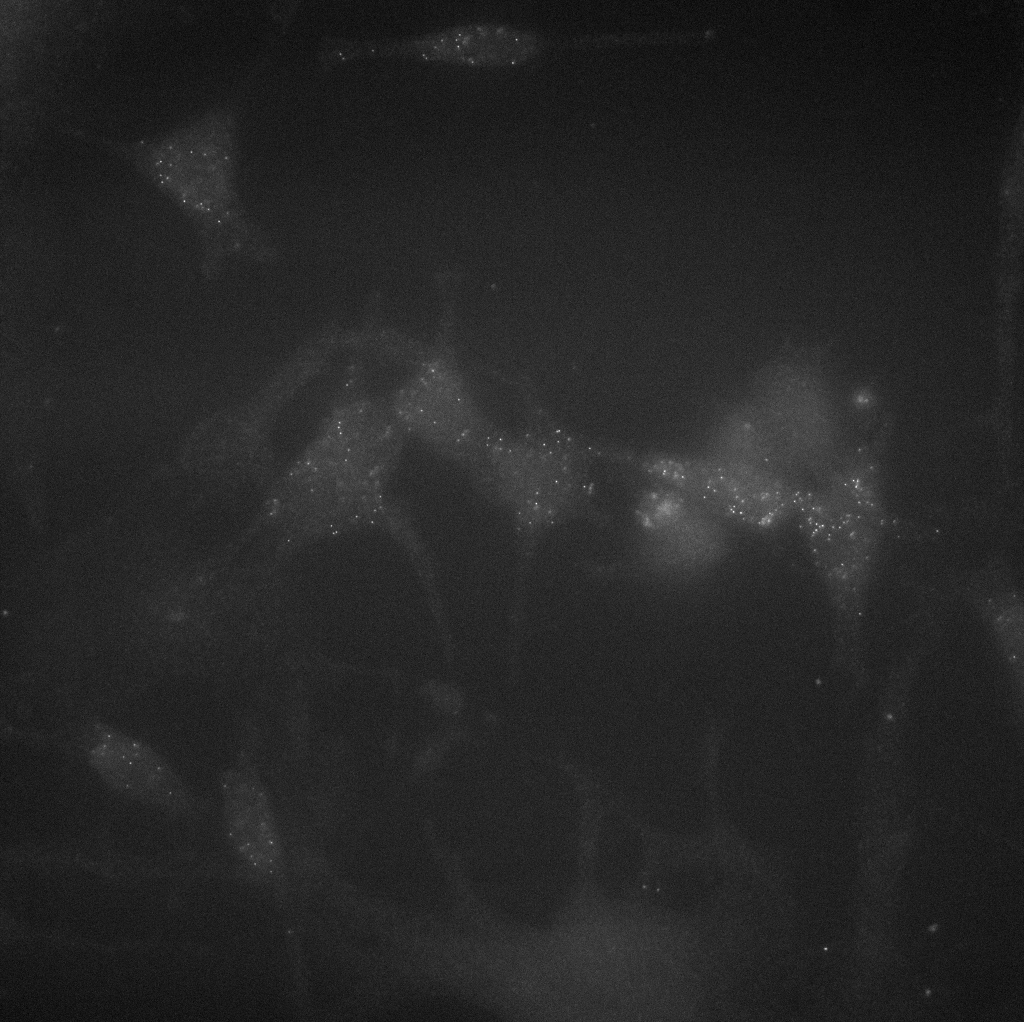

In [83]:
from PIL import Image, ImageDraw
from IPython.display import display

from skimage import exposure

# Assuming 'image' is a NumPy array
# First, ensure your image data is in the correct format. If it's uint16 as from your previous message, it should be fine.
# But if you're working with a different scale, adjust accordingly.

# Rescale the intensity of the image
image_rescaled = exposure.rescale_intensity(image, in_range='image', out_range='uint8')

# Convert the rescaled image back to a PIL Image for display
image_pil_rescaled = Image.fromarray(image_rescaled)

if image_pil_rescaled.mode != 'RGB':
    image_pil_rescaled = image_pil_rescaled.convert('RGB')

# Display the adjusted image
display(image_pil_rescaled)


338.5713881648452 427.3475029678598


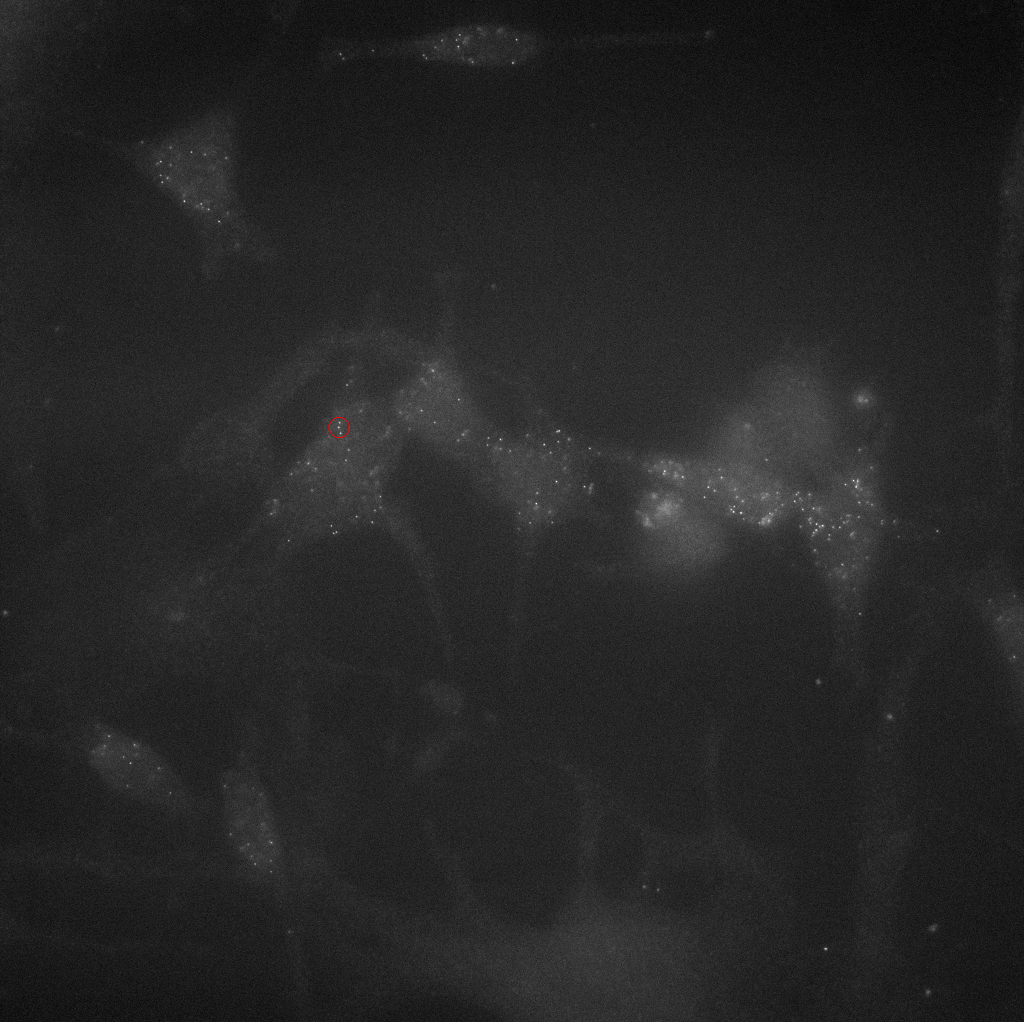

In [91]:
draw = ImageDraw.Draw(image_pil_rescaled)

# Specify the x, y coordinate you want to mark
# x, y = 100, 150  # Example coordinates
print(x,y)
x_round = round(x)
y_round = round(y)

# Draw a circle around the coordinate. Adjust the radius and fill as needed.
radius = 10  # Size of the circle
# draw.ellipse((x - radius, y - radius, x + radius, y + radius), outline='red', fill=None)
draw.ellipse((x_round - radius, y_round - radius, x_round + radius, y_round + radius), outline='red', fill=None)

# Display the image with the symbol
display(image_pil_rescaled)

In [90]:
print(y,x)
print(image[y,x])

427.3475029678598 338.5713881648452


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [85]:
import numpy as np

# Assuming 'image' is your original NumPy array and 'x', 'y' are the coordinates
x, y = round(x), round(y)  # Ensure x, y are integers

# Define the size of the box around the point
offset = 4  # 2 pixels in either direction

# Calculate the bounds of the box
x_min = max(x - offset, 0)
x_max = min(x + offset + 1, image.shape[1])  # Add 1 because slice end index is exclusive
y_min = max(y - offset, 0)
y_max = min(y + offset + 1, image.shape[0])  # Add 1 because slice end index is exclusive

# Extract the 5x5 box around the point
box = image[y_min:y_max, x_min:x_max]

# Print the pixel values as a table
print("Pixel values in the 5x5 box centered at (x={}, y={}):".format(x, y))
print(box)


Pixel values in the 5x5 box centered at (x=339, y=427):
[[2040 2039 2004 2050 2613 2416 2051 2032 2023]
 [2037 2091 1994 1999 2047 1999 2045 2007 1936]
 [1937 1913 1977 2077 2083 2045 1977 2058 1891]
 [1934 1963 2126 2514 2323 1994 1862 1950 1885]
 [1975 2038 2247 3509 3010 2095 1988 1935 1918]
 [1952 1993 1978 2395 2172 2077 1843 2046 2017]
 [1955 1953 2074 2098 2053 2130 2129 1956 1964]
 [1970 1982 2013 2036 2071 2110 2065 1912 1964]
 [1978 1914 1909 2019 1914 2106 2049 2076 2041]]


In [25]:
import math

def calculate_distance(p1, p2):
    return math.sqrt((p2['x'] - p1['x'])**2 + (p2['y'] - p1['y'])**2 + (p2['z'] - p1['z'])**2)

def total_length(line):
    coordinates = line['coordinates']
    return sum(calculate_distance(coordinates[i], coordinates[i+1]) for i in range(len(coordinates)-1))

myLine = lineAnnotationList[2]
print(total_length(myLine))


164.89992701209385


Now let's try to push a new annotation

In [40]:
# Make a small square at the top left of the image
square_coords = [(10, 10),(30, 10),(30, 30),(10, 30)]

newAnnotation = {
    "tags": ['newTag'], # *** NEED TO UPDATE TO ADD A NEW TAG ****
    "shape": "polygon",
    "channel": blobAnnotationList[0]['channel'],
    "location": blobAnnotationList[0]['location'],
    "datasetId": blobAnnotationList[0]['datasetId'],
    "coordinates": [{"x": float(coord[0]), "y": float(coord[1])} for coord in square_coords]
}
annotationClient.createAnnotation(newAnnotation)


{'_id': '64a7006f1ed2b05b5e1d8b83',
 'access': {'groups': [],
  'users': [{'flags': [], 'id': '62891fc02060d362984bc104', 'level': 2}]},
 'channel': 1,
 'coordinates': [{'x': 10.0, 'y': 10.0},
  {'x': 30.0, 'y': 10.0},
  {'x': 30.0, 'y': 30.0},
  {'x': 10.0, 'y': 30.0}],
 'datasetId': '649b6efb5d422edecab7f9d8',
 'location': {'Time': 0, 'XY': 0, 'Z': 0},
 'shape': 'polygon',
 'tags': ['newTag']}